In [61]:
import numpy as np
import netCDF4 as nc
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot
(cmapmc, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmapmc_r = ListedColormap(cmapmc.colors[::-1])

In [14]:
! ncdump -h /ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/1_mesh_mask.nc

netcdf \1_mesh_mask {
dimensions:
	x = 244 ;
	y = 274 ;
	z = 80 ;
	t = UNLIMITED ; // (1 currently)
variables:
	float nav_lon(y, x) ;
	float nav_lat(y, x) ;
	float nav_lev(z) ;
	double time_counter(t) ;
	byte tmask(t, z, y, x) ;
	byte umask(t, z, y, x) ;
	byte vmask(t, z, y, x) ;
	byte fmask(t, z, y, x) ;
	byte tmaskutil(t, y, x) ;
	byte umaskutil(t, y, x) ;
	byte vmaskutil(t, y, x) ;
	byte fmaskutil(t, y, x) ;
	float glamt(t, y, x) ;
	float glamu(t, y, x) ;
	float glamv(t, y, x) ;
	float glamf(t, y, x) ;
	float gphit(t, y, x) ;
	float gphiu(t, y, x) ;
	float gphiv(t, y, x) ;
	float gphif(t, y, x) ;
	double e1t(t, y, x) ;
	double e1u(t, y, x) ;
	double e1v(t, y, x) ;
	double e1f(t, y, x) ;
	double e2t(t, y, x) ;
	double e2u(t, y, x) ;
	double e2v(t, y, x) ;
	double e2f(t, y, x) ;
	double ff(t, y, x) ;
	short mbathy(t, y, x) ;
	short misf(t, y, x) ;
	float isfdraft(t, y, x) ;
	double e3t_0(t, z, y, x) ;
	double e3u_0(t, z, y, x) ;
	double e3v_0(t, z, y, x) ;
	double e3w_0(t, z, y, x) ;


In [15]:
def get_variables_planes(dirname, filename):
    with nc.Dataset(os.path.join(dirname, filename), 'r') as nbl:
        x, y =  slice(1,-1,None), slice(1,-1,None)
        gdepw = nbl.variables['gdepw_1d'][0, :]
        tmask = nbl.variables['tmask'][0, :, y, x]
        mbathy = nbl.variables['mbathy'][0, y, x]
        e1t = nbl.variables['e1t'][0, y, x]
        e2t = nbl.variables['e2t'][0, y, x]  
        return gdepw, tmask, mbathy, e1t, e2t

In [16]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepw, tmask, mbathy, e1t, e2t = get_variables_planes(dirname, filename)
filename = '1_mesh_mask_nocanyon.nc'
gdepw0, tmask0, mbathy0, e1t0, e2t0 = get_variables_planes(dirname, filename)

In [17]:
mbathy.shape, e1t.shape, e2t.shape, tmask.shape

((272, 242), (272, 242), (272, 242), (80, 272, 242))

In [18]:
mbathy_diff = mbathy - mbathy0
xs = np.arange(mbathy_diff.shape[-1])
ys = np.arange(mbathy_diff.shape[-2])

In [19]:
axis_thalweg = np.zeros(mbathy_diff.shape[-2])
for y in range(len(axis_thalweg)):
    mbathy_row = mbathy_diff[y, :]
    max_mbathy_row = mbathy_row.max()
    x_inds_max_mbathy_row = np.where(mbathy_row == max_mbathy_row)[0]
    x_ind_thalweg = int(np.median(x_inds_max_mbathy_row))
    axis_thalweg[y] = x_ind_thalweg

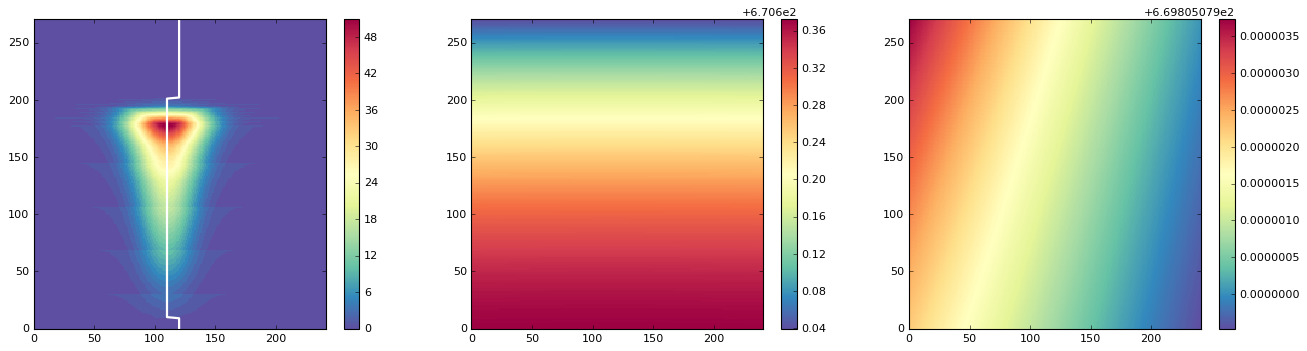

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
p1 = ax1.pcolormesh(xs, ys, mbathy_diff, cmap=cm.Spectral_r)
p2 = ax2.pcolormesh(xs, ys, e1t, cmap=cm.Spectral_r)
p3 = ax3.pcolormesh(xs, ys, e2t, cmap=cm.Spectral_r)

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(0, xs[-1]); ax.set_ylim(0, ys[-1])
fig.colorbar(p1, ax=ax1); fig.colorbar(p2, ax=ax2); fig.colorbar(p3, ax=ax3)

ax1.plot(axis_thalweg, ys, c='w', linewidth=2)

In [21]:
mbathy_diff = mbathy - mbathy0
xs = np.arange(mbathy_diff.shape[-1])
ys = np.arange(mbathy_diff.shape[-2])
mbathy_mask = np.copy(mbathy_diff)
mbathy_mask[mbathy_mask > 0] = 1

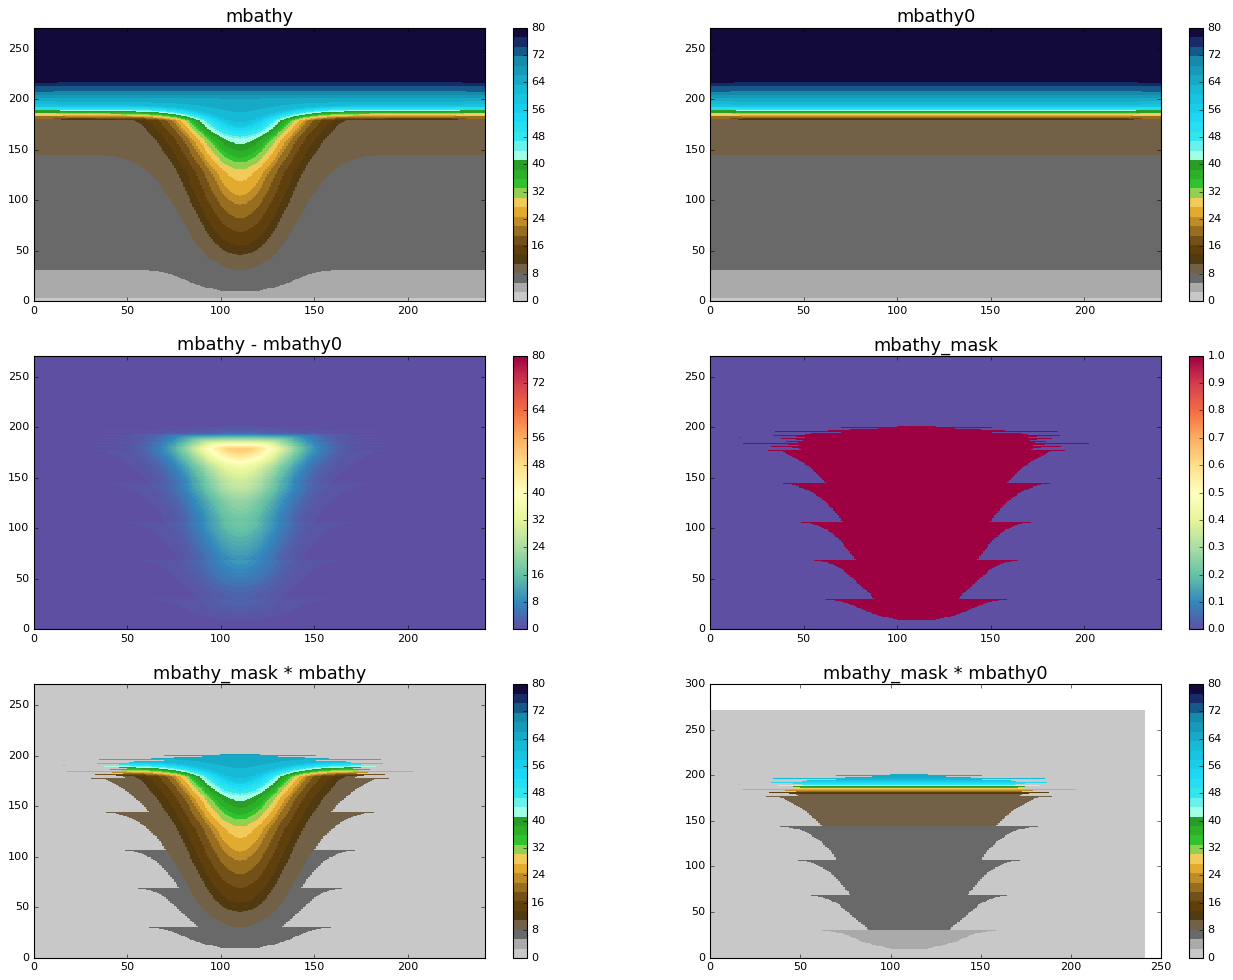

In [66]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3,2,figsize=(20,15))
p1 = ax1.pcolormesh(xs, ys, mbathy, cmap=cmapmc_r, vmin=0, vmax=80)
p2 = ax2.pcolormesh(xs, ys, mbathy0, cmap=cmapmc_r, vmin=0, vmax=80)
p3 = ax3.pcolormesh(xs, ys, mbathy_diff, cmap=cm.Spectral_r, vmin=0, vmax=80)
p4 = ax4.pcolormesh(xs, ys, mbathy_mask, cmap=cm.Spectral_r)
p5 = ax5.pcolormesh(xs, ys, mbathy_mask * mbathy, cmap=cmapmc_r, vmin=0, vmax=80)
p6 = ax6.pcolormesh(xs, ys, mbathy_mask * mbathy0, cmap=cmapmc_r, vmin=0, vmax=80)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_xlim(0, xs[-1]); ax.set_ylim(0, ys[-1])

ttls = ['mbathy', 'mbathy0', 'mbathy - mbathy0', 'mbathy_mask', 
        'mbathy_mask * mbathy', 'mbathy_mask * mbathy0']
for n, ax, p, ttl in zip(np.arange(6), [ax1, ax2, ax3, ax4, ax5, ax6], [p1,  p2, p3, p4, p5, p6], ttls):
    fig.colorbar(p, ax=ax)
    ax.set_title(ttl, fontsize=16)

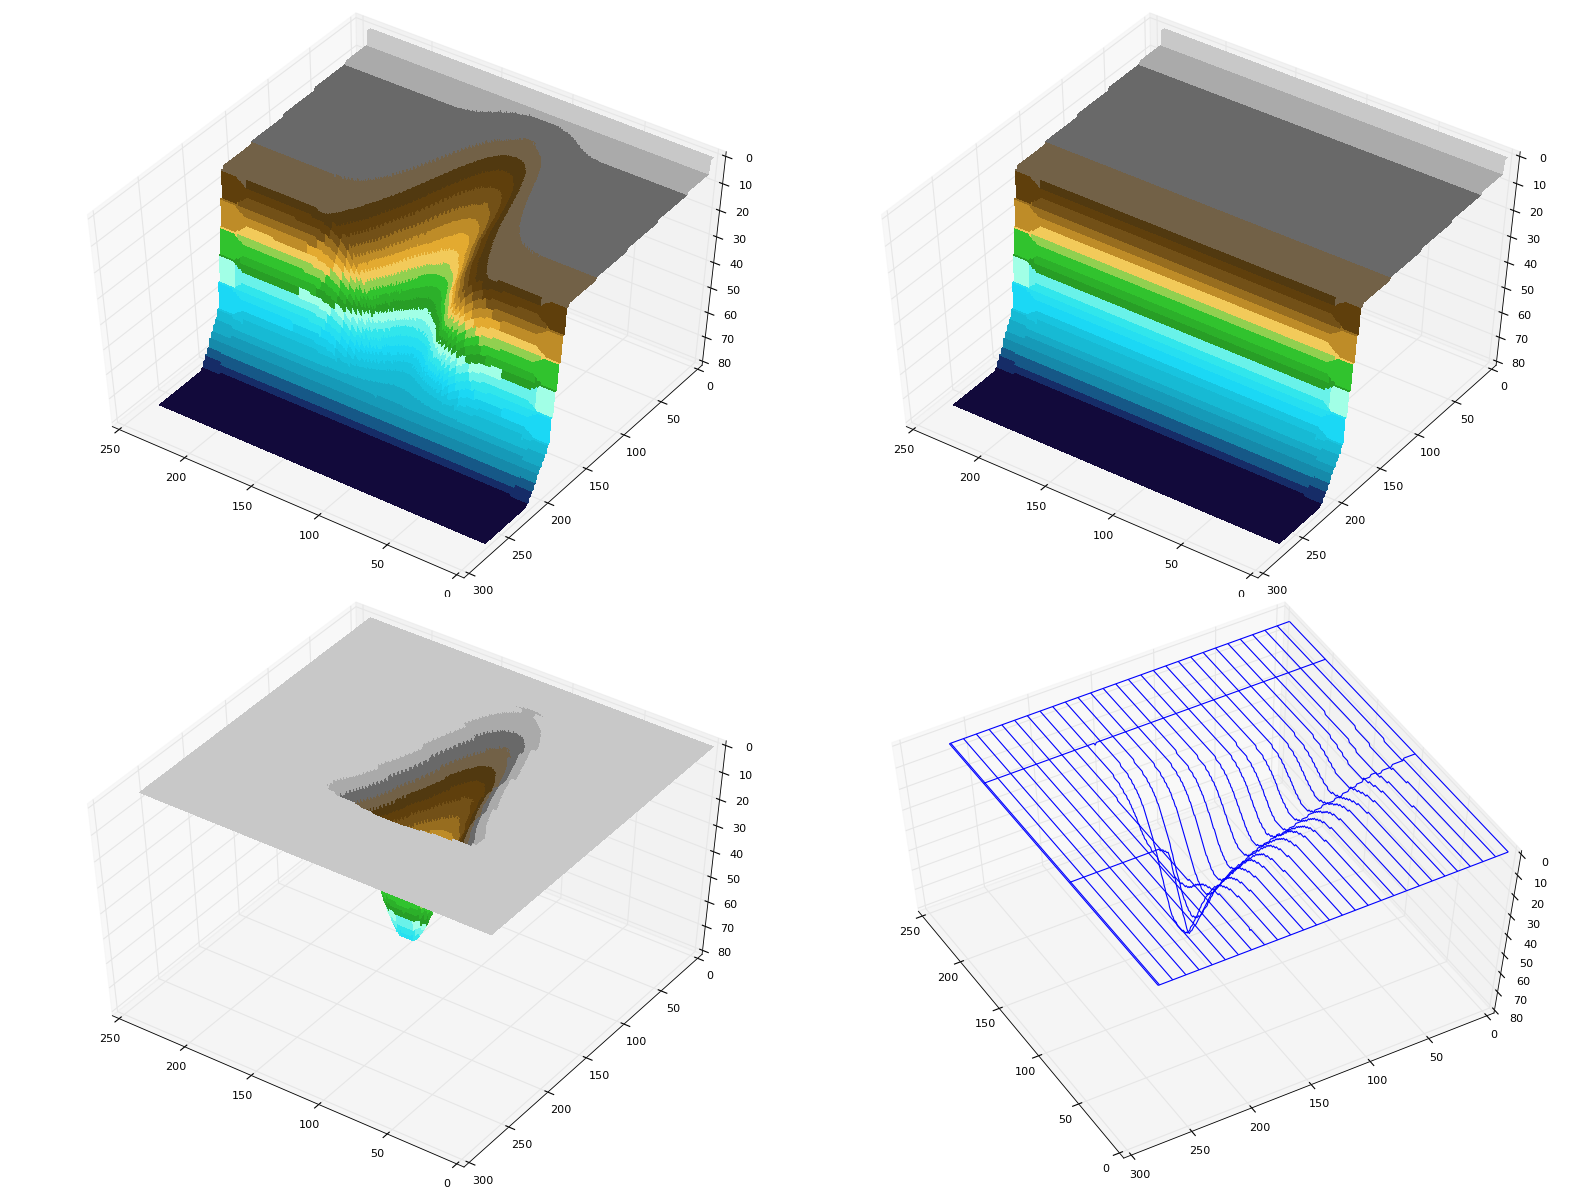

In [83]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(20, 15))
X, Y = np.meshgrid(xs, ys)
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax1.plot_surface(X, Y, mbathy, rstride=1, cstride=1, cmap=cmapmc_r, linewidth=0, antialiased=False, vmin=0, vmax=80)
ax2.plot_surface(X, Y, mbathy0, rstride=1, cstride=1, cmap=cmapmc_r, linewidth=0, antialiased=False, vmin=0, vmax=80)
ax3.plot_surface(X, Y, mbathy_diff, rstride=1, cstride=1, cmap=cmapmc_r, linewidth=0, antialiased=False, vmin=0, vmax=80)
ax4.plot_wireframe(X, Y, mbathy_diff, rstride=10, cstride=100)

for ax in [ax1, ax2, ax3]:
    ax.set_zlim(80, 0)
    ax.view_init(elev=50, azim=125)
ax4.set_zlim(80, 0)    
ax4.view_init(elev=60, azim=150)
plt.tight_layout(h_pad=0.2)